In [1]:
import keras
import tensorflow as tf
import sys
import os
print('TensorFlow version:', tf.__version__)
print('Keras version:', keras.__version__)

/home/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


TensorFlow version: 1.10.1
Keras version: 2.2.2


In [2]:
DEVICE = "/gpu:0" 

working_dir = os.getcwd()
print("Working directory is:",working_dir)
sys.path.append(working_dir)  # To find local version of the library

ROOT_DIR = os.path.join("/home/user/Source/Evrim/Turkishplate") #linux
#ROOT_DIR = os.path.join("C:/Users/is95217/source/plate/turkishplate") #win
sys.path.append(ROOT_DIR + "/Python")
import PPlate as p

DATA_DIR = "/home/user/Source/data/dataEvrim/Original_15Kcrop_distributed"  #linux
#DATA_DIR = "C:/Users/is95217/data/Original_15Kcrop_distributed" #win
print("Data:", DATA_DIR)
print("Source code:", ROOT_DIR)

Working directory is: /home/user/Source/Evrim/Turkishplate
Data: /home/user/Source/data/dataEvrim/Original_15Kcrop_distributed
Source code: /home/user/Source/Evrim/Turkishplate


# Model description and training

In [3]:
#                imgw,imgh,path,load, path & name_model, epoch_cnt
model2 = p.train2gru(128,64,DATA_DIR,False, ROOT_DIR + "/Model/model15k_2GRU", 30)
#model1 = p.train1gru(128,64,DATA_DIR,False, ROOT_DIR + "/Model/model15k_1GRU", 3)
#model3 = p.train3gru(128,64,DATA_DIR,False, ROOT_DIR + "/Model/model15k_3GRU", 3)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input (InputLayer)          (None, 128, 64, 1)   0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input[0][0]                  
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
__________________________________________________________________________________________________
max2 (MaxP

In [5]:
model2.history.history


{'acc': [0.8666598146959731,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.1859306532522231,
  0.00026197122093939314,
  0.00018940806476329899,
  0.00016515375920053373,
  0.00015203926650980473,
  0.0001436351772783059,
  0.00013773183193791492,
  0.00013332415964519709,
  0.0001298915120005401,
  0.00012713751991527512,
  0.00012487191693611631,
  0.0001229760571629461,
  0.00012136356071588263,
  0.0001199740673285864,
  0.00011876225875450559,
  0.00011769698407723634,
  0.00011675138791290765,
  0.00011590662302212648,
  0.00011514761038838406,
  0.00011446035496577272,
  0.00011383613986290392,
  0.00011326705832243627,
  0.00011274534426235173,
  0.00011226524539087268,
  0.00011182203771868461,
  0.00011141129902952905,
  0.00011103119030848463,
  0.00011067657283723645,
  0.00011034565543856261,
  0.000110036

In [ ]:
"""3 epoch

'acc': [0.7746100295220617, 0.9343433335992979, 0.9225594430702945],
 'loss': [1.6463822224895437, 0.19220429505605727, 0.2466574061728113],
 'val_acc': [0.7543075941289088, 0.7198468410976387, 0.7287611678366305],
 'val_loss': [2.3784760587064797, 2.8456657012709403, 2.8842970789353712]}
 """

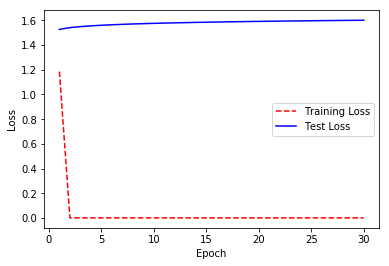

In [8]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = model2.history.history['loss']
test_loss = model2.history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


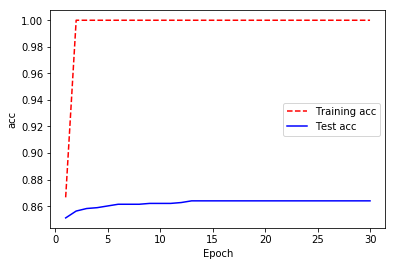

In [7]:
training_acc = model2.history.history['acc']
test_acc = model2.history.history['val_acc']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training acc', 'Test acc'])
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.show();

# Test on validation images

In [9]:
cnt_test = len(os.listdir(DATA_DIR + '/test'))

In [11]:
tiger_test = p.TextImageGenerator(DATA_DIR, 'test', 128, 64, cnt_test, 4)
tiger_test.build_data()

net_inp = model2.get_layer(name='the_input').input
net_out = model2.get_layer(name='softmax').output

from keras import backend as K
sess = tf.Session()
K.set_session(sess)


In [12]:
for inp_value, _ in tiger_test.next_batch():
    matched=0
    bs = inp_value['the_input'].shape[0]
    X_data = inp_value['the_input']
    
    net_out_value = sess.run(net_out, feed_dict={net_inp:X_data})
    pred_texts = decode_batch(net_out_value)
    
    labels = inp_value['the_labels']
    texts = []
    #print("labels:",labels)
    
    for label in labels:
        text = labels_to_text(label) 
        #print("text:",text)
        #text = ''.join(list(map(lambda x: letters[int(x)], label)))
        texts.append(text)
        #print("texts:",texts)
    
    for i in range(bs):
        #print('Predicted: %s True: %s i: %s lpred: %s ltrue: %s' % 
        #      (pred_texts[i], texts[i],str(i),len(pred_texts[i]),len(texts[i])))
        
        if pred_texts[i] == texts[i]:
            matched = matched+1
        else:
            print('wrong Predicted: %s True: %s i: %s lpred: %s ltrue: %s' % 
              (pred_texts[i], texts[i],str(i),len(pred_texts[i]),len(texts[i])))
            
    print("matched=",matched, ",total=",i, "TP: %", round(matched/i, 2) *100)
    break

FailedPreconditionError: Attempting to use uninitialized value dense2/kernel
	 [[Node: dense2/kernel/read = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense2/kernel)]]
	 [[Node: softmax/truediv/_27 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_870_softmax/truediv", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'dense2/kernel/read', defined at:
  File "/home/user/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/user/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/user/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/user/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/user/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/user/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/user/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/user/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/user/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/user/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/user/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/user/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/user/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/user/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/user/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/user/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-43b08e991a55>", line 2, in <module>
    model2 = p.train2gru(128,64,DATA_DIR,False, ROOT_DIR + "/Model/model15k_2GRU", 30)
  File "/home/user/Source/Evrim/Turkishplate/Python/PPlate.py", line 270, in train2gru
    name='dense2')(concatenate([gru_2, gru_2b]))
  File "/home/user/anaconda3/lib/python3.6/site-packages/Keras-2.2.2-py3.6.egg/keras/engine/base_layer.py", line 431, in __call__
    self.build(unpack_singleton(input_shapes))
  File "/home/user/anaconda3/lib/python3.6/site-packages/Keras-2.2.2-py3.6.egg/keras/layers/core.py", line 866, in build
    constraint=self.kernel_constraint)
  File "/home/user/anaconda3/lib/python3.6/site-packages/Keras-2.2.2-py3.6.egg/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/home/user/anaconda3/lib/python3.6/site-packages/Keras-2.2.2-py3.6.egg/keras/engine/base_layer.py", line 252, in add_weight
    constraint=constraint)
  File "/home/user/anaconda3/lib/python3.6/site-packages/Keras-2.2.2-py3.6.egg/keras/backend/tensorflow_backend.py", line 402, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "/home/user/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 259, in __init__
    constraint=constraint)
  File "/home/user/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 422, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/user/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 80, in identity
    return gen_array_ops.identity(input, name=name)
  File "/home/user/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3264, in identity
    "Identity", input=input, name=name)
  File "/home/user/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/user/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/home/user/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/home/user/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value dense2/kernel
	 [[Node: dense2/kernel/read = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense2/kernel)]]
	 [[Node: softmax/truediv/_27 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_870_softmax/truediv", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
